    ________ _______ _____  __________
    ___  __ )__  __ \__  / / /___  __/______ ______
    __  __  |_  / / /_  / / / __  /   ___/ /____/ /_
    _  /_/ / / /_/ / / /_/ /  _  /    /_  __//_  __/
    /_____/  \____/  \____/   /_/      /_/    /_/


# boutpy - tutorial

by J.G. Chen, BOUT++ team, email: cjgls@pku.edu.cn

Last Update: **V0.1.1**, 06/05/2018

**BOUTPY** is a ``Python2.x`` package intended to provide some common tools required for performing Plasmas Fluid Simulations with [BOUT++](http://boutproject.github.io/index.html) framework based on `bout-master/tools/pylib` at 06/18/2016. The BOUT++ pylib in the latest release [BOUT++ v4.0.0](https://github.com/boutproject/BOUT-dev/releases/tag/v4.0.0) is ``Python3.x`` supported.

**Download** This repo is accessible on
[GitLab](https://gitlab.com/conderls/boutpy)

**Bugs Report** The most bugs and issues are managed using the
[issue tracker](https://gitlab.com/conderls/boutpy/issues).
All suggestions, comments and feature requests are gladly wellcome and
appreciated.

## User Manual

The document for the boutpy package is available at
[ReadTheDocs](http://boutpy.readthedocs.io). The user manual for the latest
BOUT++ are available [here](http://bout-dev.readthedocs.io/en/latest/).

## Content

- [Getting Started](#Getting-Started)
- [boutgrid - More Information about BOUT++ Grid](#boutgrid---More-Information-about-BOUT++-Grid)
- [Save data to NetCDF file](#Save-data-to-NetCDF-file)
- [Advanced Plot](#Advanced-Plot)

## Getting Started

It's highly encouraged to use [Anaconda](https://www.continuum.io/downloads)
as the python environment.
Before starting to use the tools in this package, some envrionment variables
and required packages are suggested to be set up first.

```shell
# bash commands install boutpy
$ pip install boutpy

# if "IOError: Permission denied" occoured, try:
$ pip install --user boutpy

# on NERSC system:
# install boutpy on both Edison and Cori:
$ module load python/2.7-anaconda-4.4          # load latest version of python2.7
$ pip install --user boutpy

```

In [2]:
# add the followings to ~/.ipython/profile_default/startup/pythonrc.py
# import builtin modules
import os
import re
from glob import glob

# import third-party modules
import numpy as np
import matplotlib.pyplot as plt
# customize plot properties in ~/.config/matplotlib/matplotlibrc
# or as the second cell follow did

# import boutpy modules
import boutpy.boutdata as bd
import boutpy.boututils as bu
import boutpy.visualization as bv

In [3]:
# check numpy version
# optional
from distutils.version import LooseVersion, StrictVersion
assert StrictVersion(np.__version__) >= StrictVersion("1.13.1"), "the Version of numpy must be 1.13.1 or later"

In [4]:
# setup plot attributes, or use default settings without run this cell
# optional
from matplotlib import rcParams
rcParams.update({'font.size': 28,
                # 'font.weight': 'bold',
                'legend.fontsize': 28,
                'legend.labelspacing': 0.1,
                # 'legend.frameon': False,
                'figure.figsize': (7, 5),
                'lines.linewidth': 3,
                'lines.markersize': 8,
                'xtick.direction': 'out',
                'xtick.major.size': 12,
                'xtick.minor.visible': True,
                'xtick.minor.size': 8,
                'xtick.minor.width': 2,
                'xtick.major.width': 2,
                'ytick.direction': 'out',
                'ytick.major.size': 12,
                'ytick.minor.visible': True,
                'ytick.minor.size': 8,
                'ytick.minor.width': 2,
                'ytick.major.width': 2,
                'figure.facecolor': 'white',})

## help docs

- tab: auto-completion
- help(): help doc
- ?: rendered doc in jupyter or in Ipython
- ??: extra details

Online Docs
- [numpy](https://docs.scipy.org/doc/numpy/reference/)
- [scipy](https://docs.scipy.org/doc/scipy/reference/)
- [matplotlib](https://matplotlib.org/tutorials/index.html)
- [pandas](http://pandas.pydata.org/pandas-docs/stable/)

in ipython console:
```python
bv.                  # tab auto-completition
bd.collect?          # show syntax
bd.collect??         # show source file
```

In [5]:
# read NETCDF file
f = bu.file_import('input/d3d163518.02350.test.nc')
print sorted(f.keys())
f['Bpxy'].shape

[u'Bpxy', u'Btxy', u'Bxy', u'Jpar0', u'Ni0', u'Ni_x', u'Rxy', u'ShiftAngle', u'ShiftTorsion', u'Te0', u'Te_x', u'Ti0', u'Ti_x', u'Zxy', u'bmag', u'bxcvx', u'bxcvy', u'bxcvz', u'dx', u'dy', u'hthe', u'ixseps1', u'ixseps2', u'jyseps1_1', u'jyseps1_2', u'jyseps2_1', u'jyseps2_2', u'npol', u'nrad', u'nx', u'ny', u'ny_inner', u'pol_angle', u'pressure', u'psi_axis', u'psi_bndry', u'psixy', u'rmag', u'sinty', u'ydown_xin', u'ydown_xout', u'ydown_xsplit', u'yup_xin', u'yup_xout', u'yup_xsplit', u'zShift']


(260, 128)

In [7]:
loaddata = 0
if loaddata:
    path = "/global/cscratch1/sd/jgchen/6f_chm/nonlinear_1106/ne20_12"        # set your data path
    # IDL colloct.pro Do Not support negative index! It is reset to 0!! 
    P = bd.collect('P', path=path, tind=[-200, -1])
    P0 = bd.collect('P0', path=path)
    # [x, y, z, t]
    print P.shape
    print type(P)
    dc, rms = P.moment_xyzt(axis=-2)
    print dc.shape
    
# load grid
grid = bd.boutgrid('input/cbm18_dens3_ne20_0.1_1.4.grid.nc')
P0 = bd.collect('P0', path=path)
t_array = bd.collect('t_array', path=path)

Processing: [====================] 100.0%                                                                                   
data shape:  (516, 64)


#### The grid is SINGLE NULL (SND) equilibrium
#### without xpoint, all flux surfaces are closed
NOTE: using xind of peak position of P0 profile in grid!
radial domain: [ 0.10055865  0.85214518]
x-index: [0, 298]
y-index: [0, 63]
equilibrium profile normalized by: 1.00


Text(0.5,0,u'$time/\\tau_A$')

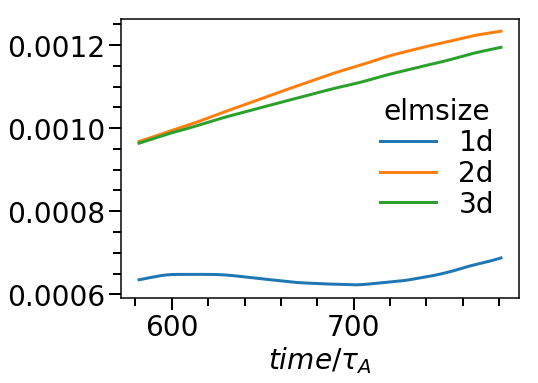

In [8]:
elmsize = bu.elmsize(dc, P0, gridfile=grid)
plt.plot(t_array[-200:], elmsize['s1'], label='1d')
plt.plot(t_array[-200:], elmsize['s2'], label='2d')
plt.plot(t_array[-200:], elmsize['s3'], label='3d')
plt.legend(title='elmsize')
plt.xlabel('$time/\\tau_A$')

Using zShift as toroidal shift angle
(516, 64)


Text(0,0.5,u'Zxy/m')

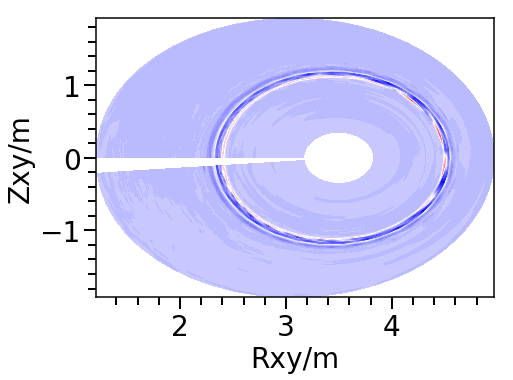

In [9]:
pol_data = bd.pol_slice(P[:, :, :, -1], gridfile='input/cbm18_dens3_ne20_0.1_1.4.grid.nc')
plt.contourf(grid['Rxy'], grid['Zxy'], pol_data, 40, cmap='bwr_r')
plt.xlabel('Rxy/m')
plt.ylabel('Zxy/m')

## boutgrid - More Information about BOUT++ Grid

- [bout++ grid class](#Bout++-Grid)
- [Read pfile](#Read-pfile)
- [map pfile to grid](#map-pfile-to-grid)

### Bout++ Grid

In [10]:
# read bout++ grid generated from hypnotoad or CORSICA
g=bd.boutgrid('input/d3d163518.02350.test.nc')
# bu.file_list('input/d3d163518.02350.test.nc', ncol=4)
print g.keys()
g['Bpxy'].shape

[u'Bpxy', u'Btxy', u'Bxy', u'Jpar0', u'Ni0', u'Ni_x', u'Rxy', u'ShiftAngle', u'ShiftTorsion', u'Te0', u'Te_x', u'Ti0', u'Ti_x', u'Zxy', u'bmag', u'bxcvx', u'bxcvy', u'bxcvz', u'dx', u'dy', u'hthe', u'ixseps1', u'ixseps2', u'jyseps1_1', u'jyseps1_2', u'jyseps2_1', u'jyseps2_2', u'npol', u'nrad', u'nx', u'ny', u'ny_inner', u'pol_angle', u'pressure', u'psi_axis', u'psi_bndry', u'psixy', u'rmag', u'sinty', u'ydown_xin', u'ydown_xout', u'ydown_xsplit', u'yup_xin', u'yup_xout', u'yup_xsplit', u'zShift']


(260, 128)

Saving figure as 'output/Jpar0(.png|.eps) ...


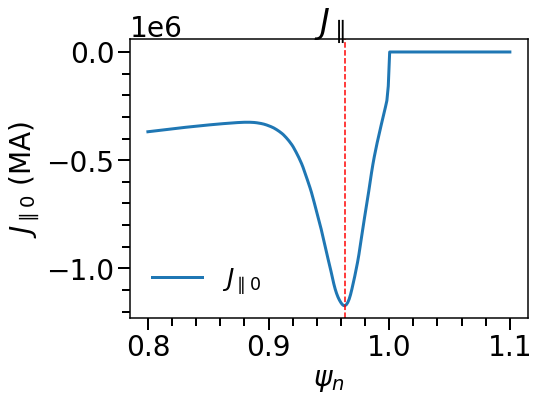

In [12]:
# get normalized psi at outer mid-plane
psin = g.psin[:, g.yind_omp]
# get the peak pressure gradient position
xind_peak, psin_peak = g.get_peak_GradP0()

plt.plot(psin, g['Jpar0'][:, g.yind_omp])
plt.axvline(psin[xind_peak], ls='--', color='r', lw=1.5)
plt.title('$J_{\parallel}$')     # Latex syntax
plt.xlabel(r'$\psi_n$')
plt.legend(['$J_{\parallel 0}$'], loc=3, fontsize=25)
plt.ylabel(r'$J_{\parallel 0}$ (MA)')

# savefig: default in .eps and .png format
bv.savefig("output/Jpar0")

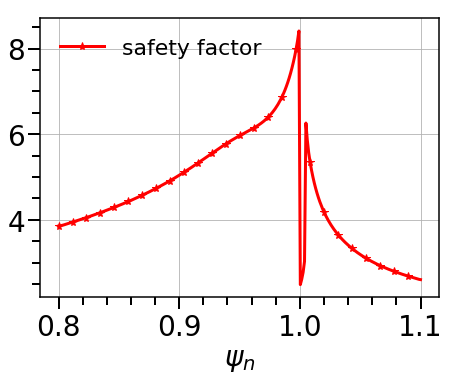

In [13]:
plt.plot(psin, g.q, 'r*-', markevery=10, label="safety factor")
plt.xlabel('$\psi_n$')
plt.grid()
plt.legend(fontsize=22, loc=2)

### Read pfile

In [14]:
pfile=bu.pfile('input/p163518.02350')
pfile.descriptions

OrderedDict([(u'ne', u'Electron density'),
             (u'te', u'Electron temperature'),
             (u'ni', u'Ion density'),
             (u'ti', u'Ion temperature'),
             (u'nb', u'Fast ion density'),
             (u'pb', u'Fast ion pressure'),
             (u'ptot', u'Total pressure'),
             (u'omeg', u'Toroidal rotation: VTOR/R'),
             (u'omegp', u'Poloidal rotation: Bt * VPOL / (RBp)'),
             (u'omgvb',
              u'VxB rotation term in the ExB rotation frequency: OMEG + OMEGP'),
             (u'omgpp',
              u'Diamagnetic term in the ExB rotation frequency: (P_Carbon)/dpsi / (6*n_Carbon)'),
             (u'omgeb', u'ExB rotation frequency: OMGPP + OMGVB = Er/(RBp)'),
             (u'er', u'Radial electric field from force balance: OMGEB * RBp'),
             (u'ommvb',
              u'Main ion VXB term of Er/RBp, considered a flux function'),
             (u'ommpp',
              u'Main ion pressure term of Er/RBp, considered a flux func

In [15]:
pfile.units    # some builtin units for each variable, updated after loading pfile.

OrderedDict([(u'ne', '10^20/m^3'),
             (u'te', 'KeV'),
             (u'ni', '10^20/m^3'),
             (u'ti', 'keV'),
             (u'nb', '10^20/m^3'),
             (u'pb', 'kPa'),
             (u'ptot', 'kPa'),
             (u'omeg', 'kRad/s'),
             (u'omegp', 'kRad/s'),
             (u'omgvb', 'kRad/s'),
             (u'omgpp', 'kRad/s'),
             (u'omgeb', 'kRad/s'),
             (u'ommvb', 'kRad/s'),
             (u'ommpp', 'kRad/s'),
             (u'omevb', 'kRad/s'),
             (u'omepp', 'kRad/s'),
             (u'er', 'kV/m'),
             (u'kpol', 'km/s/T'),
             (u'N Z A', u''),
             (u'omghb', u''),
             (u'nz1', '10^20/m^3'),
             (u'vtor1', 'km/s'),
             (u'vpol1', 'km/s'),
             (u'nz2', u'10^20/m^3'),
             (u'vtor2', u'km/s'),
             (u'vpol2', u'km/s')])

Vars in pfile:  ['ne', 'te', 'ni', 'ti', 'nb', 'pb', 'ptot', 'omeg', 'omegp', 'omgvb', 'omgpp', 'omgeb', 'ommvb', 'ommpp', 'omevb', 'omepp', 'er', 'kpol', u'N Z A', 'nz1', 'vtor1', 'vpol1']

Attributes of each var:  [u'units', u'derivative', u'data', u'description', 'psinorm']


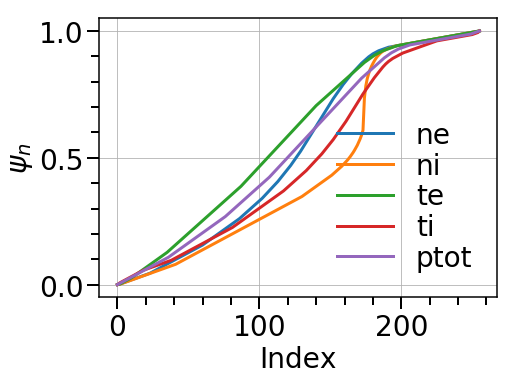

In [16]:
# WARNING: different vars in pfile
print "Vars in pfile: ", pfile.keys()
print
print "Attributes of each var: ", pfile['ne'].keys()

plt.plot(pfile['ne']['psinorm'], label='ne')
plt.plot(pfile['ni']['psinorm'], label='ni')
plt.plot(pfile['te']['psinorm'], label='te')
plt.plot(pfile['ti']['psinorm'], label='ti')
plt.plot(pfile['ptot']['psinorm'], label='ptot')
plt.xlabel('Index')
plt.ylabel('$\psi_n$')
plt.grid()
plt.legend()

In [17]:
# interpolate pfile to same psin
pfile_new = pfile.interpolate(npoints=500, output="output/p163518.02350_same_psin.nc")
pfile_new.keys()

saving data to 
	output/p163518.02350_same_psin.nc ...


[u'psin',
 'ne',
 'te',
 'ni',
 'ti',
 'nb',
 'pb',
 'ptot',
 'omeg',
 'omegp',
 'omgvb',
 'omgpp',
 'omgeb',
 'ommvb',
 'ommpp',
 'omevb',
 'omepp',
 'er',
 'kpol',
 'nz1',
 'vtor1',
 'vpol1']

Text(0.5,1,u'$N_e (10^{20}m^{-3})$')

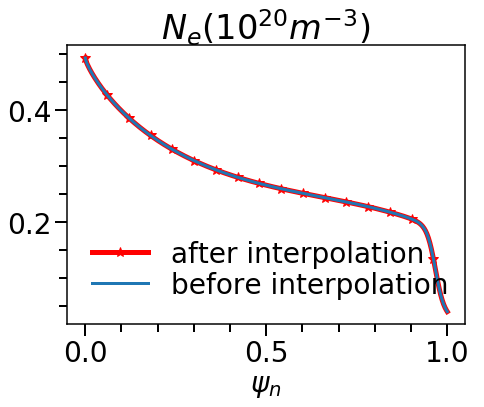

In [18]:
plt.plot(pfile_new['psin'], pfile_new['ne'], 'r*-', lw=5, markevery=30, ms=10, label='after interpolation')
plt.plot(pfile['ne']['psinorm'], pfile['ne']['data'], label='before interpolation')
plt.legend()
plt.xlabel('$\psi_n$')
plt.title('$N_e (10^{20}m^{-3})$')

### map pfile to grid

#### The grid is LOWER DOUBLE NULL (LDND) equilibrium
#### with two xpoints
smooth around separatrix area ...
===> mapping ti ...
NOTE: set constant value outside the [0.0, 1.0]!!!!!
===> mapping ni ...
NOTE: set constant value outside the [0.0, 1.0]!!!!!
===> mapping ne ...
NOTE: set constant value outside the [0.0, 1.0]!!!!!
NOTE: set constant value outside the [0.0, 1.0]!!!!!
NOTE: set constant value outside the [0.0, 1.0]!!!!!
NOTE: map omgeb to E_r
      E_r = omgeb*Rxy*Bpxy

save data to output/new_mapped.nc ...


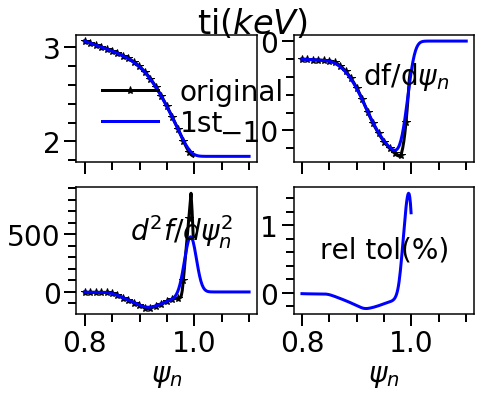

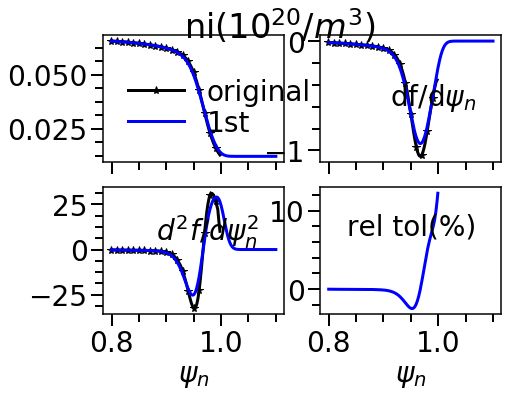

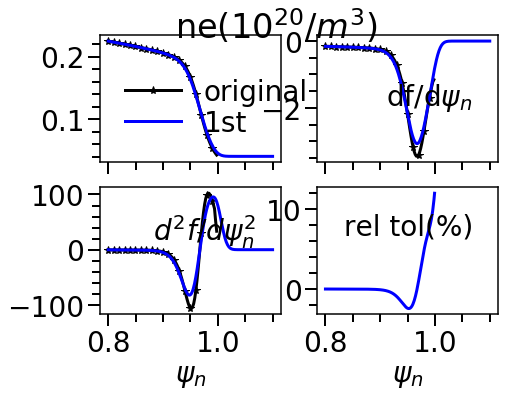

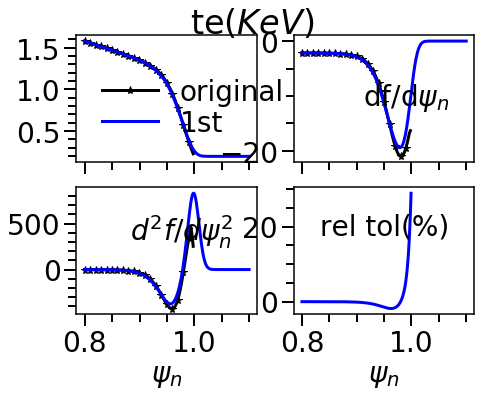

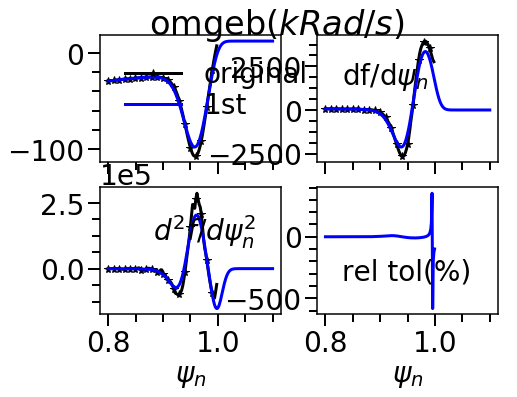

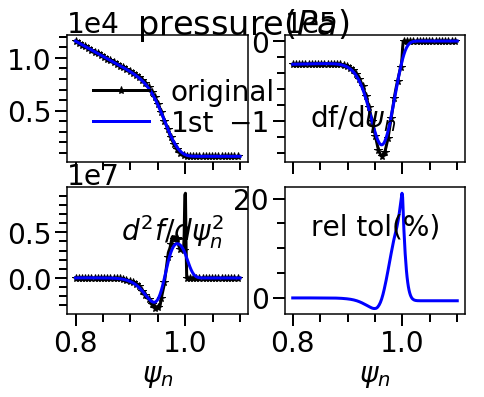

In [19]:
# builtin function: map_pfile2grid()
# constant value in SOL
# version of numpy must be later then '1.13.1'
bd.map_pfile2grid(gridfile='input/d3d163518.02350.test.nc', pfile='input/p163518.02350', output='output/new_mapped.nc')

#### customize profile

NOTE: set constant value outside the [0.0, 1.0]!!!!!


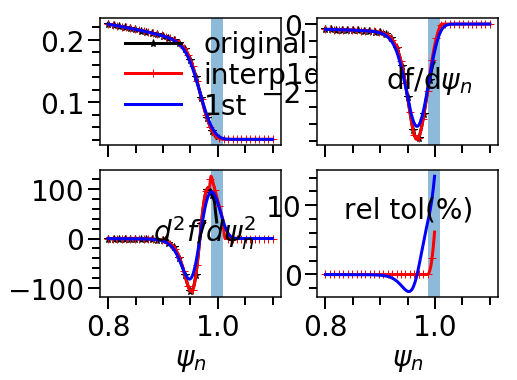

In [20]:
# constantly extend to SOL
data2d = bd.map_1d4grid(pfile_new['psin'], pfile_new['ne'], gridfile='input/d3d163518.02350.test.nc', index=10, ext='const')

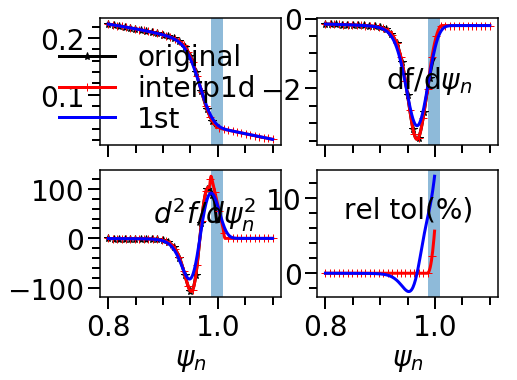

In [21]:
# extend to SOL with slope
data2d_slope = bd.map_1d4grid(pfile_new['psin'], pfile_new['ne'], gridfile='input/d3d163518.02350.test.nc', index=10, ext=-0.2)

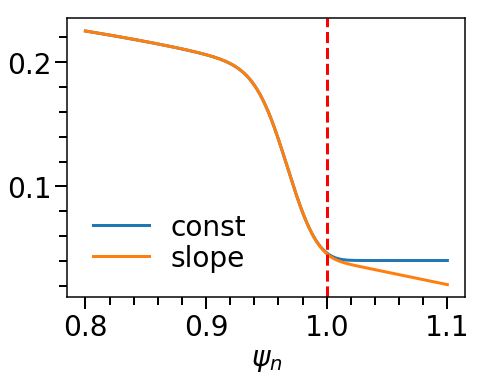

In [22]:
plt.plot(psin, data2d[:, g.yind_omp], label='const')
plt.plot(psin, data2d_slope[:, g.yind_omp], label='slope')
plt.xlabel('$\psi_n$')
plt.axvline(1.0, ls='--', color='r')
plt.legend()

### Save data to NetCDF file

In [23]:
# only data type supported.
bu.save2nc("output/save_test.nc", "w", a=3, b=[4, 5, 6])
f_test = bu.file_import('output/save_test.nc')
print f_test.keys()
f_test

[u'a', u'b']


{u'a': array(3, dtype=int32), u'b': array([4, 5, 6], dtype=int32)}

## Advanced Plot

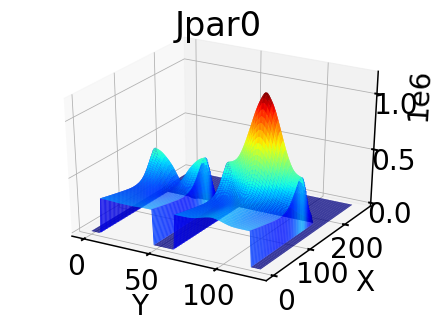

In [24]:
bv.surface(-g['Jpar0'], title='Jpar0', xlabel='Y', ylabel='X')

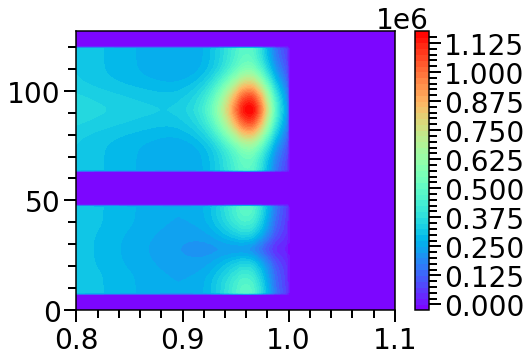

In [25]:
X, Y = np.meshgrid(psin, np.arange(128))
plt.contourf(X, Y, -g['Jpar0'].T, 50, cmap='rainbow')
plt.colorbar()

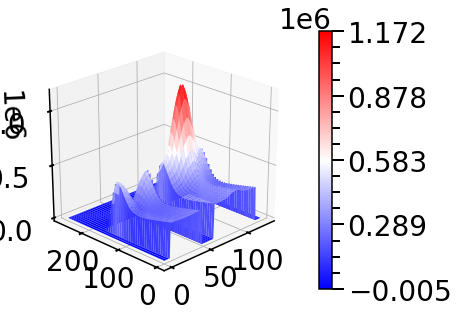

In [26]:
# Field class
Jpar0_F = bd.Field(-g['Jpar0'])
Jpar0_F.showdata()
plt.tight_layout()

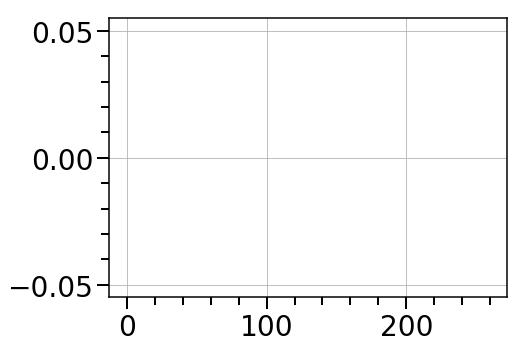

In [27]:
Jpar0_F.plot(kind='animation', interval=200) # animation works in ipython